In [7]:
import pandas as pd
import sys
import os
import scanpy as sc
import seaborn as sns

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [8]:
# read in the data relevant for this figure
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'
    df = pd.read_csv(fname, sep='\t')    
    return df

def get_sc_tes_bed():
    
    fname = '../processing/ends/sc_tes.bed'
    df = pd.read_csv(fname, sep='\t', header=None, usecols=[3,9])
    df.columns = ['peak_id', 'read_name']
    
    return df

def get_bulk_data():
    fname = '../processing/talon/bulk_talon_read_annot.tsv'
    df = pd.read_csv(fname, sep='\t')    
    return df

def get_bulk_tss_bed():
    
    fname = '../processing/ends/bulk_tss.bed'
    df = pd.read_csv(fname, sep='\t', header=None, usecols=[3,9])
    df.columns = ['peak_id', 'read_name']
    return df

def get_bulk_tes_bed():
    
    fname = '../processing/ends/bulk_tes.bed'
    df = pd.read_csv(fname, sep='\t', header=None, usecols=[3,9])
    df.columns = ['peak_id', 'read_name']
    return df

def get_tss_adata():
    fname = '../processing/scanpy/sc_tss.h5ad'
    adata = sc.read(fname)
    
    return adata

### Panel S4B

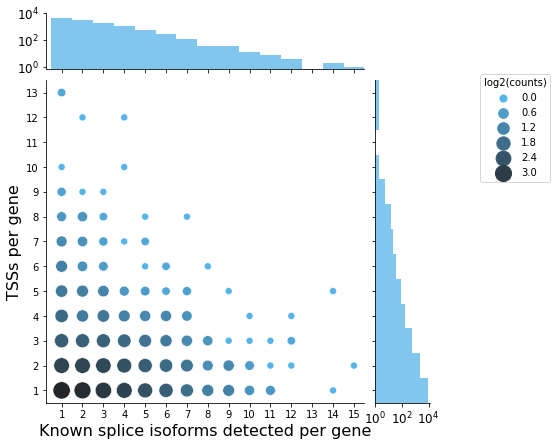

In [3]:
df = get_bulk_data()
tss = get_bulk_tss_bed()

ylim = 13
xlim = 15

opref = 'figures/bulk_tss'

plot_ends_iso(df, tss, opref, kind='tss', xlim=xlim, ylim=ylim)

### Panel S4D

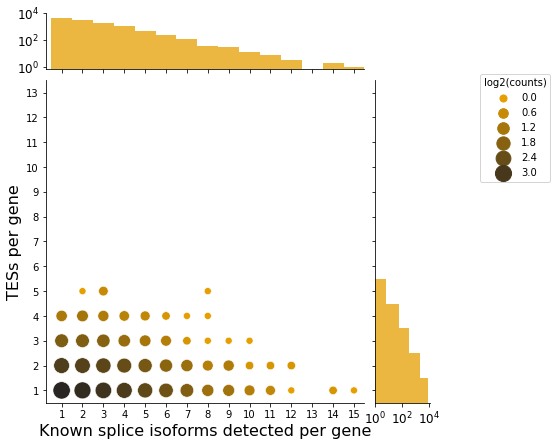

In [4]:
df = get_bulk_data()
tes = get_bulk_tes_bed()

ylim = 13
xlim = 15

opref = 'figures/bulk_tes'

plot_ends_iso(df, tes, opref, kind='tes', xlim=xlim, ylim=ylim)

### Panel S4E

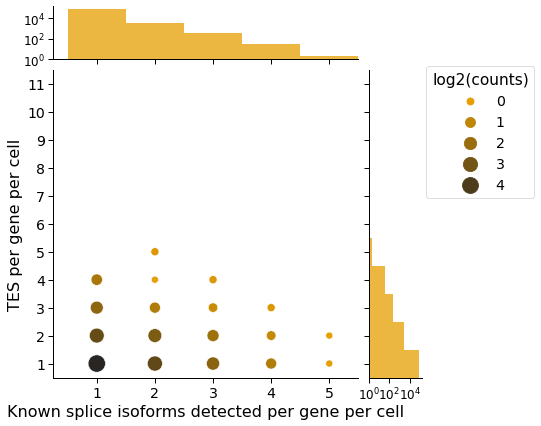

In [5]:
df = get_sc_data()
tes = get_sc_tes_bed()

ylim = 11
xlim = 5

opref = 'figures/sc_tss'

plot_ends_iso_cell(df, tes, opref, kind='tes', xlim=xlim, ylim=ylim)

### Panel S4H

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_cate

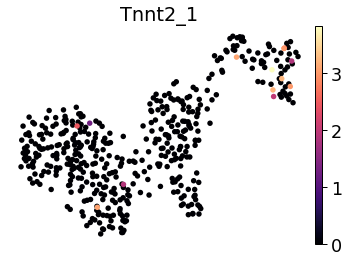

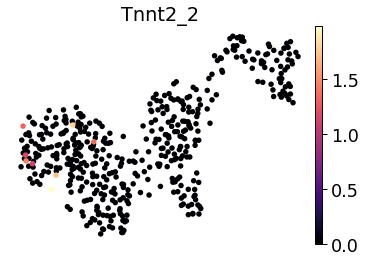

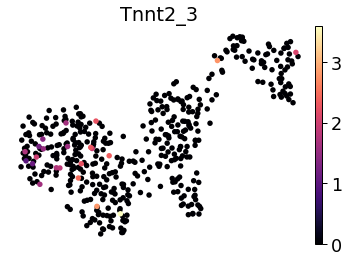

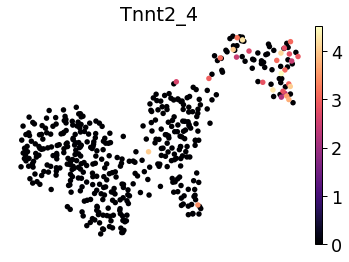

In [13]:
adata = get_tss_adata()
opref = 'figures/tss'
sns.set_context('paper', font_scale=2)

tsss = adata.var.loc[adata.var.gene_name == 'Tnnt2'].index.unique().tolist()
for tss in tsss:
    sc.pl.umap(adata, color=tss, frameon=False, size=120, return_fig=True, color_map='magma')
    ofig = '{}_{}_umap.pdf'.format(opref, tss)
    plt.savefig(ofig, dpi=300, bbox_inches='tight')  

### Panel S4J

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/fairliereese/miniconda3/lib/python3.7/site-pac

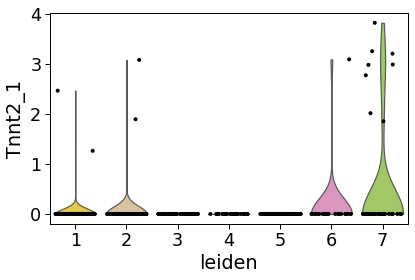

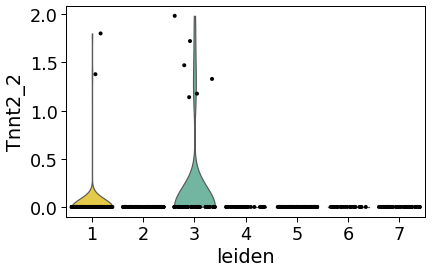

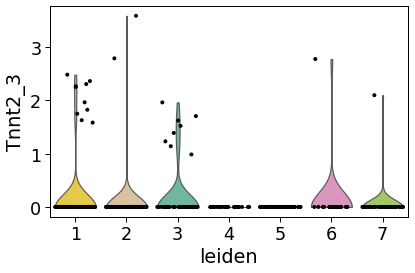

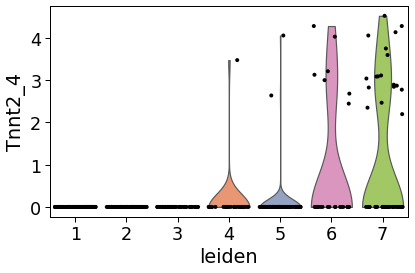

In [15]:
for tss in tsss:
    sc.pl.violin(adata, tss, groupby='leiden', jitter=0.4,
        size = 4, show = False)
    ofig = '{}_{}_leiden_violin.pdf'.format(opref, tss)
    plt.savefig(ofig, dpi=300, bbox_inches='tight')